# Introducción a la Programación para Ciencia de Datos
## Lenguaje de programación R
_Rocío Romero Zaliz_ - rocio@decsai.ugr.es

# Estructuras de programación

* R es un lenguaje estructurado en bloques (como C, C++, Python, Perl, etc.).
* Los bloques están delimitados por llaves, mientras que las sentencias están separadas por caracteres de nueva línea u, opcionalmente, por punto y coma.
* Al igual que con muchos lenguajes de scripting, no "declaramos" variables en R, por lo tanto tenemos que tener cuidado con los posibles problemas de alcance de variables.

## Operadores básicos de R
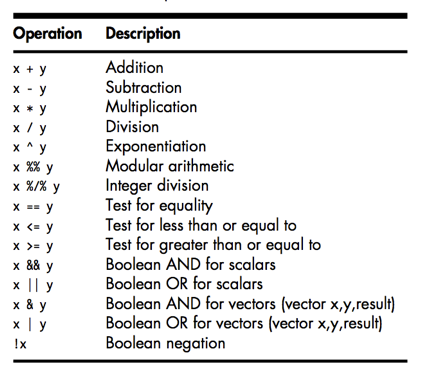

## Sentencias de control: if-else

La sintaxis para if-else es la siguiente:

>if (r == 4) {  
     x <- 1  
 } else {  
     x <- 3  
     y <- 4 
 }

In [ ]:
r <- 3
x <- 0
y <- 0

if (r == 4) {  
 x <- 1  
} else {  
 x <- 3  
 y <- 4 
}

print(x)
print(y)

Una sentencia if-else funciona como una llamada a una función, y como tal, devuelve el último valor asignado.

In [ ]:
print(if (x == 2) y <- x else y <- x+1)

In [ ]:
y <- if(x == 2) x else x+1 # Recomendación: esta es la forma más elegante... usad esta porfaplis
y

In [ ]:
# Error!
x <- 1:10
y <- if (x == 2) x else x+1
y

In [ ]:
x == 2

Cuando trabajamos con vectores, utilizamo la función `ifelse`.

La forma es: `ifelse(b,u,v)` donde `b` es un vector booleano, y `u` y `v` son vectores.

El valor de retorno es a su vez un vector: el elemento `i` es `u[i]` si `b[i]` es verdadero, o `v[i]` si `b[i]` es falso.

In [ ]:
x <- 1:10
y <- ifelse(x == 2, x, x+1)
y

In [ ]:
x <- 1:10
ifelse(x %% 2 == 0, "par", "impar")

In [ ]:
x <- c(5,2,9,12)
y <- ifelse(x > 6, 2*x, 3*x)
y

## Declaraciones de control: ciclos

Uno de los temas principales de la programación en R es evitar los ciclos si es posible; si no, mantener los ciclos lo más simple posible.

Tenemos:
* Ciclos For
* Ciclos While
* Ciclos de repetición

### For loops

In [ ]:
# Sólo un ejemplo, por favor no codifiques así en R... Por faaaaaaaa... :'(
for (n in 1:5) print(n) 

In [ ]:
# In R use print(1:5)
print(1:5)

In [ ]:
# Sólo un ejemplo, por favor no codifiques así en R... Por faaaaaaaa...
print(x)

k <- 0
for (n in x) {
   if (n %% 2 == 1) k <- k+1  
} 
k

In [ ]:
# In R use...
sum(x %% 2 == 1)

In [ ]:
# He aquí el porque...
k <- 0
x <- 1:10000000
system.time(for (n in x) if (n %% 2 == 1) k <- k+1)
system.time(sum(x %% 2 == 1))

### While loops

In [ ]:
# Sólo un ejemplo, por favor no codifiques así en R... Por faaaaaaaa...
print(x[1:10])

i <- 1
while ((i < length(x)) & (x[i] != 9)) {
    i <- i+1
}
i

In [ ]:
# In R use...
which(x == 9)

In [ ]:
# He aquí el porque...
i <- 1
x <- 1:1000000
system.time(while ((i < length(x)) && (x[i] != 999999)) i <- i+1)
system.time(which(x == 999999))

### Repeat loops

In [ ]:
# Sólo un ejemplo, por favor no codifiquéis así en R...
# Honestamente odio los repeats en R... Odio el `break` en cualquier lenguaje de programación
# Llamadme "negacionista del break"

i <- 0
repeat {
    i <- i+1
    if ((i > length(x)) || (x[i] == 9)) break
}
i 

In [ ]:
# In R use...
which(x == 9)

In [ ]:
# This is why:
i <- 1
x <- 1:100000
system.time(repeat {
    i <- i+1
    if ((i > length(x)) || (x[i] == 99999)) break
    })
system.time(which(x == 99999)[1])

# Looping: the R way

En R tienes más opciones a la hora de hacer cálculos de repetición:

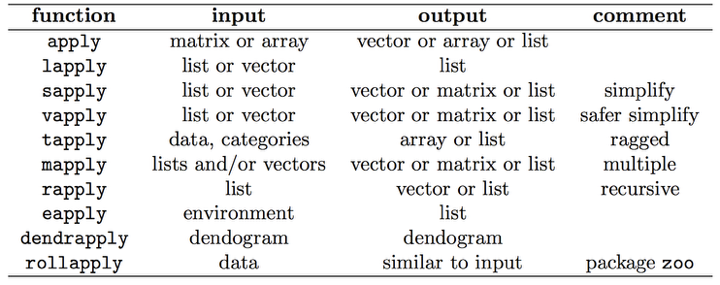

#### La función apply

Esta es la forma general de apply para matrices: 

`apply(m, dimcode, f, fargs)` 

donde:
* `m` es la matriz o array. 
* `Dimcode` es la dimensión, igual a 1 si la función se aplica a las filas o a 2 si se aplica a las columnas.
* `f` es la función a aplicar. 
* `fargs` es un conjunto opcional de argumentos a suministrar a `f`. 

In [ ]:
z <- matrix(c(1,1,2,2,3,3), nrow=3, byrow=TRUE)
print(z)

In [ ]:
apply(z, 1, mean)

In [ ]:
apply(z, 1, mean, na.rm = TRUE)

In [ ]:
apply(z, 2, mean)

In [ ]:
print(apply(z, 1:2, mean))

In [ ]:
apply(z, 1, function(x) {print(x) ; x ^ 2})

In [ ]:
apply(z, 1, \(x) {print(x) ; x ^ 2})

#### La función lapply

Devuelve una lista de la misma longitud que los datos de entrada X, cada uno de cuyos elementos es el resultado de aplicar una función al elemento correspondiente de X.

In [ ]:
w <- list(vector=c(1,2,3), matriz=matrix(1,nrow=2,ncol=2))
w

In [ ]:
lapply(w, mean)

In [ ]:
suma <- function(x = 1, y = 5) {
    x + y
}

In [ ]:
print(lapply(1:10, suma, x = 2))

In [ ]:
lapply

#### La función sapply

Se aplica sobre un objeto y devuelve un objeto simplificado (un vector) si es posible.

In [ ]:
z

In [ ]:
out1 <- lapply(z, mean)
print(out1)

In [ ]:
out <- sapply(z, mean)
print(out)

In [ ]:
?sapply

In [ ]:
out <- unlist(lapply(z, mean))
print(out)
class(out)

In [ ]:
df1 <- data.frame(uno=1:4, dos=c("hola", "mundo", "muy", "cruel"))
df1

In [ ]:
apply(df1, 1, mean)

In [ ]:
apply(df1, 2, mean)

In [ ]:
apply(df1, 1:2, mean)

In [ ]:
df1

In [ ]:
as.list(df1)

In [ ]:
lapply(df1, mean)

# Mejora del rendimiento: velocidad y memoria

* Para tener un programa que funcione rápido, puede que necesites utilizar más espacio de memoria.
* Por otro lado, para conservar espacio de memoria, puede que tenga que conformarse con un código más lento.
* R es un lenguaje interpretado.
* Muchos de los comandos están escritos en C y por lo tanto se ejecutan en código máquina rápido. Pero otros comandos, y su propio código R, son R puro y por lo tanto interpretado.
* Todos los objetos de una sesión de R se almacenan en memoria.
* Más precisamente, todos los objetos se almacenan en el espacio de direcciones de memoria de R.
* Optimice su código R a través de la vectorización, el uso de la compilación byte-code y otros enfoques. 
* Escriba las partes clave, intensivas en CPU, de su código en un lenguaje compilado como C/C++.
* Escriba su código en alguna forma de R paralelo. 

## Vectorización

### Ciclos:
 * Es importante entender que simplemente reescribir el código para evitar bucles no necesariamente hará que el código sea más rápido.
 * Sin embargo, en algunos casos, se puede conseguir un aumento drástico de la velocidad, normalmente a través de la vectorización. 
 
Compare estas dos líneas de código:

> `for (i in 1:length(x)) z[i] <- x[i] + y[i]`

vs.

> `z <- x + y `

In [ ]:
x <- runif(1000000)
y <- runif(1000000)
z <- vector(length=1000000)
system.time(for (i in 1:length(x)) z[i] <- x[i] + y[i])

In [ ]:
system.time(z <- x + y)

* Ejemplos de otras funciones vectorizadas que pueden acelerar el código son `ifelse()`, `which()`, `any()`, `all()`, `cumsum()`, y `cumprod()`.
* En el caso de matrices, puede utilizar `rowSums()`, `colSums()`, etc.
* En configuraciones del tipo "todas las combinaciones posibles", `combn()`, `outer()`, `lower.tri()`, `upper.tri()`, o `expand.grid()` pueden ser justo lo que necesitas. 
* Aunque `apply()` elimina un bucle explícito, en realidad está implementada en R en lugar de en C, por lo que normalmente no acelerará su código. Sin embargo, las otras funciones apply, como `lapply()`, pueden ser muy útiles para acelerar su código. 

In [ ]:
outer(1:5, 1:5, "+")

## Mejora del rendimiento

<b>Ejemplo 1</b>: Algoritmo lento en R

In [ ]:
xs <- runif(10000)
print(xs)
res <- c()

# This is slow!
system.time(for (x in xs) res <- c(res, sqrt(x)))

<b>Ejemplo 1</b>: Algoritmo rápido en R

In [ ]:
seq_along(xs)

In [ ]:
res <- numeric(length(xs))

system.time(for (i in seq_along(xs)) res[i] <- sqrt(xs[i]))

In [ ]:
system.time(sqrt(xs))

<b>Ejemplo 2</b>: Algoritmo lento en R

In [ ]:
amat <- matrix(1:20, nrow=4)
bmat <- matrix(NA, nrow(amat)/2, ncol(amat))

print(amat)
print(bmat)

system.time(for(i in 1:nrow(bmat)) bmat[i,] <- amat[2*i-1,] * amat[2*i,])
            
print(bmat)

<b>Ejemplo 1</b>: Algoritmo rápido en R

In [ ]:
system.time(bmat2 <- amat[seq(1, nrow(amat), by=2),] * amat[seq(2, nrow(amat), by=2),])

print(bmat2)

<b>Ejemplo 3</b>: Algoritmo lento en R

* Supongamos que queremos encontrar todos los conjuntos de tres enteros positivos que suman 6, donde el orden importa:

In [ ]:
the.seq <- 1:3

In [ ]:
#for (x in the.seq) {
#    for (y in the.seq) {
#        for (z in the.seq) {
#            if (x + y + z == 6) cat(x, y, z, "\n")
#        }
#    }
#}
#
#cat("\n")

system.time(for (x in the.seq) { for (y in the.seq) { for (z in the.seq) { if (x + y + z == 6) cat(x, y, z, "\n")}}})

In [ ]:
print(outer(the.seq, the.seq, "+"))

In [ ]:
print(outer(outer(the.seq, the.seq, "+"), the.seq, "+"))

In [ ]:
which(outer(outer(the.seq, the.seq, "+"), the.seq, "+") == 6)

In [ ]:
which(outer(outer(the.seq, the.seq, "+"), the.seq, "+") == 6, arr.ind=TRUE)

In [ ]:
system.time(which(outer(outer(the.seq, the.seq, "+"), the.seq, "+") == 6, arr.ind=TRUE))

## Vectorizar en exceso

* Es bueno querer vectorizar cuando no hay una manera efectiva de hacerlo. Es malo intentarlo de todos modos.
* Un reflejo común es usar una función de la familia apply. **Esto no es vectorización, es ocultar bucles.**
* Utilice un bucle for explícito cuando cada iteración sea una tarea no trivial. Pero un bucle simple puede expresarse de forma más clara y compacta usando una función apply.

## Reflexiones finales

* Algunas cosas no son posibles de vectorizar. 
* Si necesitas usar un bucle, entonces:
    * Ponga todo lo que pueda fuera de los bucles como sea posible.
    * Haz el número de iteraciones lo más pequeño posible.

# References

* Gaston Sanchez. Handling and Processing Strings in R. https://www.gastonsanchez.com/Handling_and_Processing_Strings_in_R.pdf
* Norman Matloff. 2011. The Art of R Programming: A Tour of Statistical Software Design (1st ed.). No Starch Press, San Francisco, CA, USA.
* Patrick Burns. 2011. The R Inferno.

# Ejercicios extra
http://r-tutorials.com

## Víctimas del Titanic - Utiliza el conjunto de datos estándar `titanic`

In [ ]:
help(Titanic)

In [ ]:
dim(Titanic)

In [ ]:
Titanic

* Utiliza la función de apply adecuada para obtener la suma de hombres y mujeres a bordo.

* Obtener una tabla con la suma de supervivientes vs sexo.

* Obtener una tabla con la suma de pasajeros por sexo vs edad.

## Extraer elementos de una lista de matrices

In [ ]:
first <- matrix(38:67, 3)
second <- matrix(56:91, 3)
third <- matrix(82:147, 3)
fourth <- matrix(46:95, 5)

listobj <- list(first, second, third, fourth)
listobj

* Extraer la segunda columna de la lista de matrices (de cada matriz individual).

* Extraer la tercera fila de la lista de matrices.

## Usando la familia 'apply' para trabajar con clases de data.frames

* Averiguar qué columna del iris no es numérica.

In [ ]:
iris

## Cálculo de módulo en una matriz

In [ ]:
mymatrix <- matrix(data = c(6,34,923,5,0, 112:116, 5,9,34,76,2, 545:549), nrow = 5)
mymatrix

* Utilice `apply` para calcular el módulo 10 en cada valor de la matriz. La nueva matriz contiene el resto de la división módulo.

## Aplicando nuestras propias funciones...

* Imprime para cada elemento en `mymatrix` si es menor que 100 (True) o no (False).

## Ejercicios
Se pueden hacer todos sin necesidad de bucles explícitos... pensad... pensad...

1. Crear una función "creciente" que indique si los elementos de un array dado son estrictamente crecientes. No se permite ordenar el vector.
2. Crear una función "montecarlo" que calcule la estimación de la integral dada:
 >$\int_{0}^{1} x^2 dx$<br/>
   
   El algoritmo Monte Carlo en pseudocódigo es el siguiente:
>hits=0<br/>
 for i from 1 to N<br/>
 &nbsp;&nbsp;&nbsp;&nbsp;Generate two random numbers r1 and r2 between 0 and 1<br/>
 &nbsp;&nbsp;&nbsp;&nbsp;If r2<r1^2 then hits=hits+1<br/>
 end for<br/>
 return hits/N

    HINT: Use las funciones `runif()` y `rnorm()`.
3. Crea una lista de cinco matrices numéricas y ordena cada una de ellas tras su creación (el elemento [1,1] tendrá el valor menor y el [#filas,#columnas] el valor mayor).
4. Calcula el valor mínimo de cada columna de una matriz, pero suponiendo que los números impares son negativos y los pares positivos.
5. Dada una matriz devuelve una lista de todos los valores mayores que 7 de cada fila.

# Programación con Tidyverse (paquete `purrr`)
* `map()`: permite aplicar una función con un único argumento a un vector
* `map2()`: permite aplicar una función con dos argumentos a un vector
* `pmap()`: permite aplicar una función con múltiples argumentos a un vector

https://dcl-prog.stanford.edu/purrr-basics.html

In [ ]:
library(tidyverse)

?map

In [ ]:
starwars %>% select(height, mass) %>% map(mean, na.rm=TRUE)

In [ ]:
starwars %>% select(height, mass) %>% mean(na.rm=TRUE)

In [ ]:
print(starwars %>% select(height, mass) %>% map_dbl(mean, na.rm=TRUE))

In [ ]:
starwars %>% map_if(is.numeric, mean, na.rm=TRUE)

In [ ]:
starwars %>% select(height, mass) %>% map(\(df) class(df))

In [ ]:
?map2

In [ ]:
starwars %>% select(height, mass) %>% 
    mutate(resultado=map2_dbl(height, mass, `-`)) %>% 
    head(5)

In [ ]:
starwars %>% select_if(is.numeric) %>% head(5)

In [ ]:
?pmap